In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to SQLite (it will create the DB if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
sample_data = [
    ("Laptop", 5, 700.00),
    ("Mouse", 15, 25.00),
    ("Keyboard", 10, 45.00),
    ("Monitor", 7, 150.00),
    ("Laptop", 3, 700.00),
    ("Mouse", 5, 25.00)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [3]:
query = '''
    SELECT
        product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty  revenue
0  Keyboard         10    450.0
1    Laptop          8   5600.0
2   Monitor          7   1050.0
3     Mouse         20    500.0


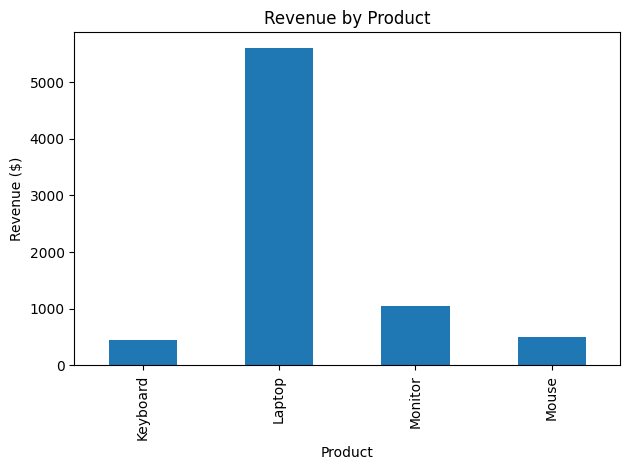

In [4]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


In [5]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>